# Getting Started with TensorFlow from TensorFlow Tutorial For Beginners 
(https://www.datacamp.com/community/tutorials/tensorflow-tutorial)

- errors encountered when trying to model the neural network due to the fact that the attribute .contrib is no longer supported by Tensor Flow 2.0

In [1]:
# Importing tensorflow library
import tensorflow as tf

- Placeholders are values that are unassigned and that will be initialized by session when you run it.
- Variables are values that can change
- Constants are variables that don't change

In [2]:
# Initializing two variables that are constants (arrays)
x1 = tf.constant([1,2,3,4]) # Creates a constant tensor from a tensor-like object.
x2 = tf.constant([5,6,7,8]) 

# Multiplying variables and storing it in new result variable
result = tf.multiply(x1,x2)

# Printing the result
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


- Result doesnt actually get calculated, it just defines the model. However, no process ran to calculate the result.


In [3]:
# To see result, run code in an interactive session.

# Intialize the Session
with tf.compat.v1.Session() as sess: # in code had tf.session() - however that did not work for TF 2.0 change

    # Initialize two constants
    x1 = tf.constant([1,2,3,4])
    x2 = tf.constant([5,6,7,8])

    # Multiply
    result = tf.multiply(x1, x2)

    # Print the result
    print(sess.run(result))

    # Close the session
    sess.close()


[ 5 12 21 32]


In [4]:
# Another way of doing it

# Intialize the Session
with tf.compat.v1.Session() as sess:
    
    # Initialize two constants
    x1 = tf.constant([1,2,3,4])
    x2 = tf.constant([5,6,7,8])

    # Multiply
    result = tf.multiply(x1, x2)

    # Run `result`
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


Can pass in options as well.
If specify the config argument and use ConfigProto (protocol buffer) to add configuration options to the session.



In [5]:
# Make sures that you log the GPU or CPU device that is assigned to operation
# Gives info on which devices are used in the session for each operation
config=tf.compat.v1.ConfigProto(log_device_placement=True)

In [6]:
# For soft constraints
config=tf.compat.v1.ConfigProto(allow_soft_placement=True)

### Loading And Exploring The Data
- First, set your ROOT_PATH. 
    - This path is the one where you have made the directory with your training and test data.
- Next, you can add the specific paths to your ROOT_PATH with the help of the join() function. 
    - You store these two specific paths in train_data_directory and test_data_directory.
- You see that after, you can call the load_data() function and pass in the train_data_directory to it.
- Now, the load_data() function itself starts off by gathering all the subdirectories that are present in the train_data_directory
    - It does so with the help of list comprehension, which is quite a natural way of constructing lists - it basically says that, if you find something in the train_data_directory, you’ll double check whether this is a directory, and if it is one, you’ll add it to your list. 
    - Remember that each subdirectory represents a label.
- Next, you have to loop through the subdirectories. 
    - You first initialize two lists, labels and images. 
    - Next, you gather the paths of the subdirectories and the file names of the images that are stored in these subdirectories. 
    - After, you can collect the data in the two lists with the help of the append() function.

In [7]:
import os
from skimage import io

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
        
    return images, labels

ROOT_PATH = "/Users/myriambengoecheapardo/Downloads"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

### Traffic Sign Statistics

In [8]:
import numpy as np

images_array = np.array(images)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
print(images_array[0])

1
4575
[[[ 47  52  59]
  [ 35  64  72]
  [ 53 104 112]
  ...
  [ 75  82  60]
  [ 72  77  55]
  [ 68  71  50]]

 [[ 46  51  57]
  [ 38  66  74]
  [ 58 109 115]
  ...
  [ 74  84  62]
  [ 76  84  62]
  [ 76  83  61]]

 [[ 44  50  56]
  [ 44  71  79]
  [ 59 109 115]
  ...
  [ 71  83  61]
  [ 74  84  63]
  [ 75  84  63]]

 ...

 [[120 141 139]
  [119 144 138]
  [114 141 131]
  ...
  [ 33  30  27]
  [ 32  30  28]
  [ 30  30  28]]

 [[133 151 145]
  [124 146 138]
  [111 137 127]
  ...
  [ 31  30  25]
  [ 32  32  27]
  [ 33  33  30]]

 [[139 158 147]
  [124 146 137]
  [107 132 123]
  ...
  [ 31  30  23]
  [ 33  33  27]
  [ 35  36  31]]]


<ipython-input-8-9757c3f8923a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images_array = np.array(images)


- Printed out ine single image that is represented by arrays in arrays

In [9]:
labels_array= np.array(labels)

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
62


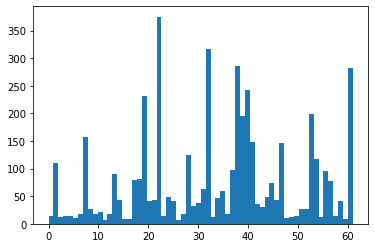

In [10]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

- Not all types of traffic signs are equally represented in the dataset
- At first sight, you see that there are labels that are more heavily present in the dataset than others: the labels 22, 32, 38, and 61 definitely jump 

### Visualizing Traffic Signs

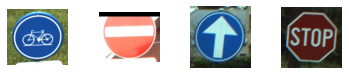

In [11]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

- Not the same size, to test hypothesis, print shape, min and max values

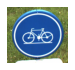

shape: (236, 256, 3), min: 0, max: 255


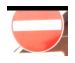

shape: (133, 164, 3), min: 0, max: 255


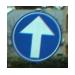

shape: (122, 121, 3), min: 0, max: 255


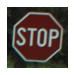

shape: (123, 123, 3), min: 0, max: 215


In [12]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


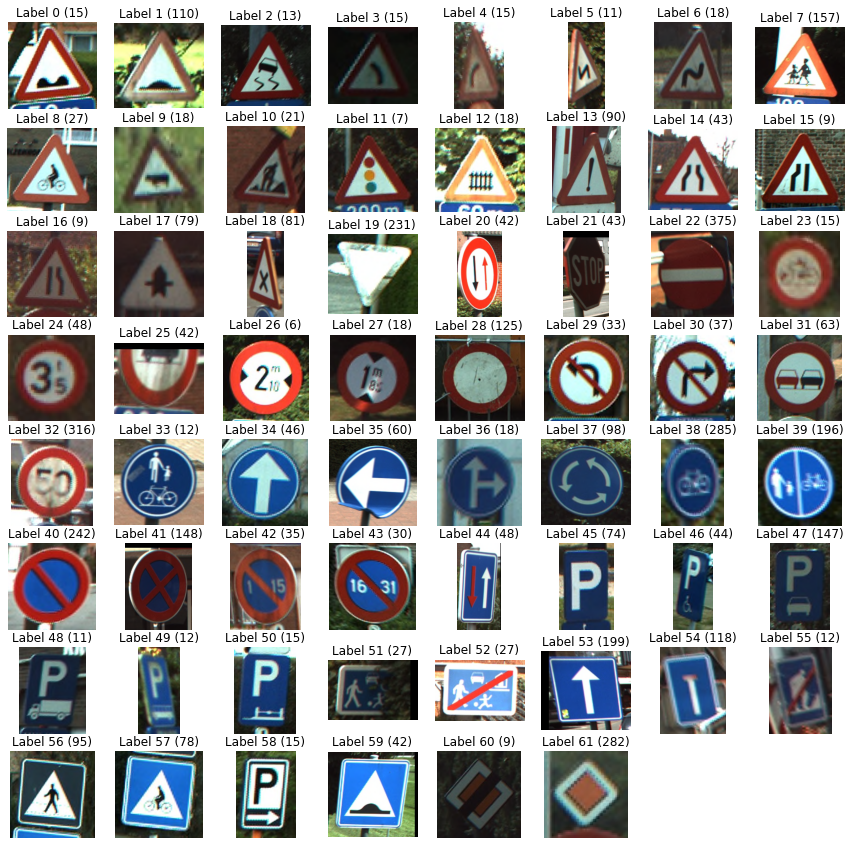

In [13]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

### Feature Extraction
- Insights:
    - The size of the images was unequal;
    - There are 62 labels or target values (as your labels start at 0 and end at 61);
    - The distribution of the traffic sign values is pretty unequal; There wasn’t really any connection between the signs that were heavily present in the dataset.

### Rescaling Images
- Images are now 4D

In [14]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

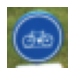

shape: (28, 28, 3), min: 0.08711484593837542, max: 0.9921568627450981


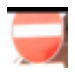

shape: (28, 28, 3), min: 0.0, max: 0.9921568627450981


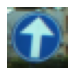

shape: (28, 28, 3), min: 0.052893657462985286, max: 0.9652661064425772


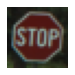

shape: (28, 28, 3), min: 0.05225465186074435, max: 0.7078168767507


In [15]:
# Checking result of rescaling

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

### Image Conversion to Grayscale
- The color in the pictures matters less when you’re trying to answer a classification question.


In [16]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

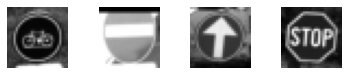

In [17]:
# Adjusted images

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

## Deep Learning with Tensor Flow
### Modeling the Neural Network

In [18]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

import tensorflow as tf
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)


### Running the Neural Network

In [ ]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

In [ ]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

In [ ]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [ ]:
# Alternatively, you can also run the following lines of code instead of the code chunk above:
#with tf.Session() as sess:
#    sess.run(tf.global_variables_initializer())
#    for i in range(201):
#        print('EPOCH', i)
#        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
#        if i % 10 == 0:
#            print("Loss: ", loss)
#        print('DONE WITH EPOCH')

### Evaluating Neural Network

In [ ]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()


In [ ]:
# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))